In [1]:
import os
import numpy as np
import pandas as pd
import umap
import time

In [27]:
def get_sequences(fastadir=None, fastafile=None):
    sequences = []
    if fastadir is None and fastafile is None:
        print("No fasta dir or file")
        raise
    if fastadir is not None and fastafile is not None:
        print("Choose one, fasta dir or multi fasta filr")
        raise
    # check for a directory with individual fasta files
    # or a multi fasta file
    if fastadir is not None:
        fastafiles = os.listdir(fastadir)
        for f in fastafiles:
            counter = 0
            for record in SeqIO.parse(os.path.join(fastadir, f), "fasta"):
                sequences.append(record)
                counter += 1
                if counter > 1:
                    print("More than one fasta record?", f)
                    raise
    elif fastafile is not None:
        for record in SeqIO.parse(fastafile, "fasta"):
            sequences.append(record)
    return sequences

In [4]:
# Load disprot embedding data

# Disprot
embeddir="/data/franco/datasets/prot_embedding_weights/disprot/halft5/"
fasta_dir = "/data/franco/datasets/disprot/fasta/"
fasta_files = os.listdir(fasta_dir)
counter = 0

embeddings = list()
uniprots   = list()
for ff in fasta_files:
    uniprot_id = ff.rstrip().split(".")[0]
    embedfile = os.path.join(embeddir, f"{uniprot_id}.gz")
    if os.path.exists(embedfile):
        embeddings.append(np.loadtxt(embedfile))
        uniprots.append(uniprot_id)
        counter += 1
print(f"Loaded {counter} protein embeddings")

Loaded 2221 protein embeddings


In [29]:
annotfile = "/data/franco/datasets/disprot/DisProt_release_2022_06_reformat_annot.fasta"
annotdir  = None
annots    = get_sequences(fastadir=annotdir, fastafile=annotfile)

In [30]:
# find annotation for each sequence
# read annotation data first
annot_dict = dict()
for record in annots:
    if "|" in record.name:
        name = record.name.split("|")[1].strip()
    else:
        name = record.name.split()[0].strip()
        if name == "":
            print("Name is empty",record.name)
    annot_dict[name] = str(record.seq)

In [33]:
disprot_annotations = list()
print(len(embeddings), len(uniprots))
for u in uniprots:
    # print(u, annot_dict[u])
    disprot_annotations.append(annot_dict[u])

2221 2221


In [45]:
def get_contents(annotations):
    disorder_contents = list()
    for da in annotations:
        contents = [ x != "-" for x in da]
        DC = np.sum(contents) / len(contents)
        disorder_contents.append(DC)
    return disorder_contents

disprot_disorder_contents = get_contents(disprot_annotations)

In [5]:
# Load monomers embedding data
from Bio import SeqIO

counter = 0
embeddir = "/data/franco/datasets/prot_embedding_weights/monomers/halft5/"
embeddings_mono = list()
monomers   = list()
multifasta_file = "/data/franco/datasets/disprot/monomers.fasta"
for record in SeqIO.parse(multifasta_file, "fasta"):
    if "|" in record.name:
        name = record.name.split("|")[1].strip()
    else:
        name = record.name.split()[0].strip()
        if name == "":
            print("Name is empty",record.name)
    embedfile = os.path.join(embeddir, f"{name}.gz")
    if os.path.exists(embedfile):
        print(name)
        embeddings_mono.append(np.loadtxt(embedfile))
        monomers.append(uniprot_id)
        counter += 1
print(f"Loaded {counter} protein embeddings")

1AE9A
1AH7A
1AHOA
1AOCA
1AOLA
1AQZA
1ATGA
1ATZA
1AYOB
1AZOA
1B9WA
1BKRA
1BM8A
1BQUA
1BTEA
1BXOA
1BXYB
1C1KA
1C7KA
1CC8A
1CHDA
1CJWA
1CTFA
1CV8A
1CY5A
1D0QA
1D2OA
1D2SA
1D4OA
1DD9A
1DMGA
1DQGA
1DS1A
1DVOA
1DYPA
1DZFA
1E2WA
1E5KA
1EB6A
1EDMB
1EFDN
1EJ8A
1ELKA
1EOKA
1EQ2A
1ES5A
1EW4A
1EZ3A
1F32A
1F46A
1F9VA
1FC3A
1FCQA
1FCYA
1FO8A
1FPZA
1FT5A
1FVIA
1G12A
1G2RA
1G61A
1G66A
1G8AA
1GAKA
1GCIA
1GMIA
1GMXA
1GNYA
1GPPA
1GS9A
1GUIA
1GWMA
1GXMA
1GXYA
1H4XA
1H8PB
1HDOA
1HH8A
1HRUA
1HTWA
1HXIA
1HXNA
1HXRA
1HYPA
1I1WA
1I27A
1I2TA
1I4JA
1I58A
1I8AA
1IAPA
1ID0A
1IFRA
1II5A
1IIBA
1IKTA
1IN4A
1IO0A
1IQ4A
1IQZA
1ISUA
1IT2A
1IXGA
1J0PA
1J1TA
1J3AA
1J77A
1J7XA
1J83A
1J8EA
1JB3A
1JBEA
1JE5A
1JF3A
1JG1A
1JHJA
1JHSA
1JM1A
1JMKC
1JO0B
1JOSA
1JR2A
1JUVA
1JX6A
1JYHA
1JYKA
1K4NA
1K5CA
1K6KA
1K7CA
1K7JA
1KAFA
1KHYA
1KMTA
1KNGA
1KOEA
1KP6A
1KPTA
1KQ6A
1KT6A
1KU3A
1KXOA
1KZFA
1L3KA
1L9LA
1L9XA
1LC0A
1LFPA
1LKIA
1LS1A
1LSLA
1LU4A
1LUZA
1LWBA
1M1HA
1M1QA
1M2XA
1M4LA
1M55A
1M6YA
1M9ZA
1MAIA
1MBAA
1MC2A
1MGTA
1MJ5A
1MJN

3PVHA
3PYCA
3PYWA
3Q1NA
3Q4OA
3Q6BA
3Q8JA
3QAYA
3QB8A
3QC0A
3QF2A
3QHBA
3QHPA
3QNMA
3QOUA
3QPAA
3QRLA
3QSJA
3QSLA
3QU3A
3QU5A
3QW9B
3QWLA
3QY7A
3QZRA
3R0VA
3R3QA
3R4VA
3R5TA
3R62A
3R6DA
3R72A
3R7AA
3R9FA
3RAZA
3RBSA
3RC1A
3RENA
3RF0A
3RGAA
3RGOA
3RJVA
3RK6A
3RKGA
3RL5A
3RLGA
3RLKA
3RM3A
3RMQA
3RNLA
3RPDA
3RQ4A
3RVCA
3RX9A
3RY4A
3S0AA
3S25A
3S4EA
3S5BA
3S5QA
3S6EA
3S83A
3S8SA
3S98A
3S9XA
3SB4A
3SBMA
3SD7A
3SEEA
3SHQA
3SHSA
3SIGA
3SK7A
3SK9A
3SMVA
3SNOA
3SOJA
3SREA
3SU6A
3SUKA
3SUMA
3SY1A
3T47A
3T7AA
3T7HA
3T7LA
3T7ZA
3T92A
3TBDA
3TC3A
3TC8A
3TCVA
3TEKA
3TEUA
3TFGA
3TJMA
3TLQA
3TM8A
3TMGA
3TOWA
3TQQA
3TT9A
3TUTA
3TVQA
3U01A
3U0VA
3U1LA
3U3GD
3U3LC
3U4VA
3U65B
3U9JA
3UANA
3UC9A
3UD1A
3UENA
3UGUA
3UI4A
3UIDA
3UJCA
3ULJA
3ULTA
3UMHA
3UR8A
3USHA
3UUEA
3V0DA
3V1AA
3V32B
3V3LA
3V46A
3V68A
3V7BA
3V93A
3VBCA
3VC1A
3VG7A
3VGIA
3VGPA
3VGZA
3VHJA
3VJ9A
3VN5A
3VORA
3VUSA
3VVVA
3W06A
3W0FA
3W0KA
3W0OA
3W42A
3W4SA
3W56A
3W6BA
3WAEA
3WDNA
3WE9A
3WH1A
3WMVB
3WUZA
3WVTA
3WWCA
3WWLA
3WZ3A
3X0TA
3X2MA
3X34

6I86A
6I89A
6I8YA
6IBEA
6IBHB
6ID6A
6IE3A
6IF4B
6IFBA
6IGGA
6IH0A
6IIKA
6IIXA
6IIYA
6IK4A
6IQCA
6IQTC
6ISAA
6ITAA
6IW3A
6IX1B
6IY4I
6J6PA
6J93A
6JCHA
6JIEA
6JIWA
6JKKA
6JLCA
6JLIA
6JMKA
6JNYB
6JQ8A
6JSAA
6JV0A
6K1TA
6K1WA
6K2FB
6K2HA
6K39A
6K4FU
6K82B
6K93A
6KC5B
6KFNA
6KHLA
6KJKA
6KLZA
6KMEA
6KPLA
6KTHA
6KWZA
6L0OA
6L0TB
6L1MA
6L27A
6L5TA
6L7QA
6LCHA
6LDQC
6LF2B
6LFSA
6LG3A
6LH8A
6LIYB
6LK1A
6LKKA
6LUHB
6LXAA
6LXSA
6LYXB
6M9MA
6MAAA
6MD5A
6MF4A
6MGCA
6MJ7A
6MM1C
6MOSA
6MQ7A
6MRRA
6MT7A
6MUQA
6MX6C
6MYID
6N0KA
6N1LA
6N9MA
6NAUA
6NDTB
6NEYA
6NFRA
6NFTB
6NH9B
6NHXA
6NIBA
6NIED
6NIOA
6NJWA
6NOPB
6NQ4B
6NQCA
6NSIA
6NU9A
6NVMA
6NVPA
6NXIA
6O0WA
6O1BA
6O2VA
6O4OA
6OE6A
6OEWA
6OGHA
6OJ1A
6OPFF
6OSXA
6OZEA
6P0FA
6P28A
6P5HB
6P61A
6P78A
6P80A
6P8JB
6P8OB
6PCKA
6PFQA
6PI6B
6PJVA
6PLJA
6PNYA
6PUQA
6PW7B
6PWGA
6PX0A
6PYMA
6PYOB
6Q10A
6Q1MA
6Q2UA
6Q3VA
6Q6TA
6Q7DA
6Q7RA
6QAZA
6QDIA
6QE0A
6QHJA
6QK4B
6QRLA
6QVSA
6QXRA
6QXUA
6R0RA
6R1DB
6R1GB
6R2MA
6R3MA
6R5JC
6R7VA
6RJIA
6RNVA
6RP3A
6RPXA
6RRAA
6RSN

In [ ]:
# Load monomers embedding data
# plot onto the same umap
# paint disorder content
# find the dimensions that explaines the
# most disorder content (although this should be made for aa-level embedding)

In [6]:
disprot_protembeddings = list()
monomer_protembeddings = list()
for e in embeddings:
    disprot_protembeddings.append(np.mean(e, axis=0))
    
for e in embeddings_mono:
    monomer_protembeddings.append(np.mean(e, axis=0))

In [16]:
num_disprot = len(disprot_protembeddings)
num_monomer = len(monomer_protembeddings)
all_protembeds = np.array(disprot_protembeddings + monomer_protembeddings)

In [17]:
print(num_disprot, num_monomer, all_protembeds.shape)

2221 3042 (5263, 1024)


In [18]:
import umap

my_umap = umap.UMAP(n_neighbors=200, min_dist=.25)
umap_embedding = my_umap.fit_transform(np.array(all_protembeds))

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


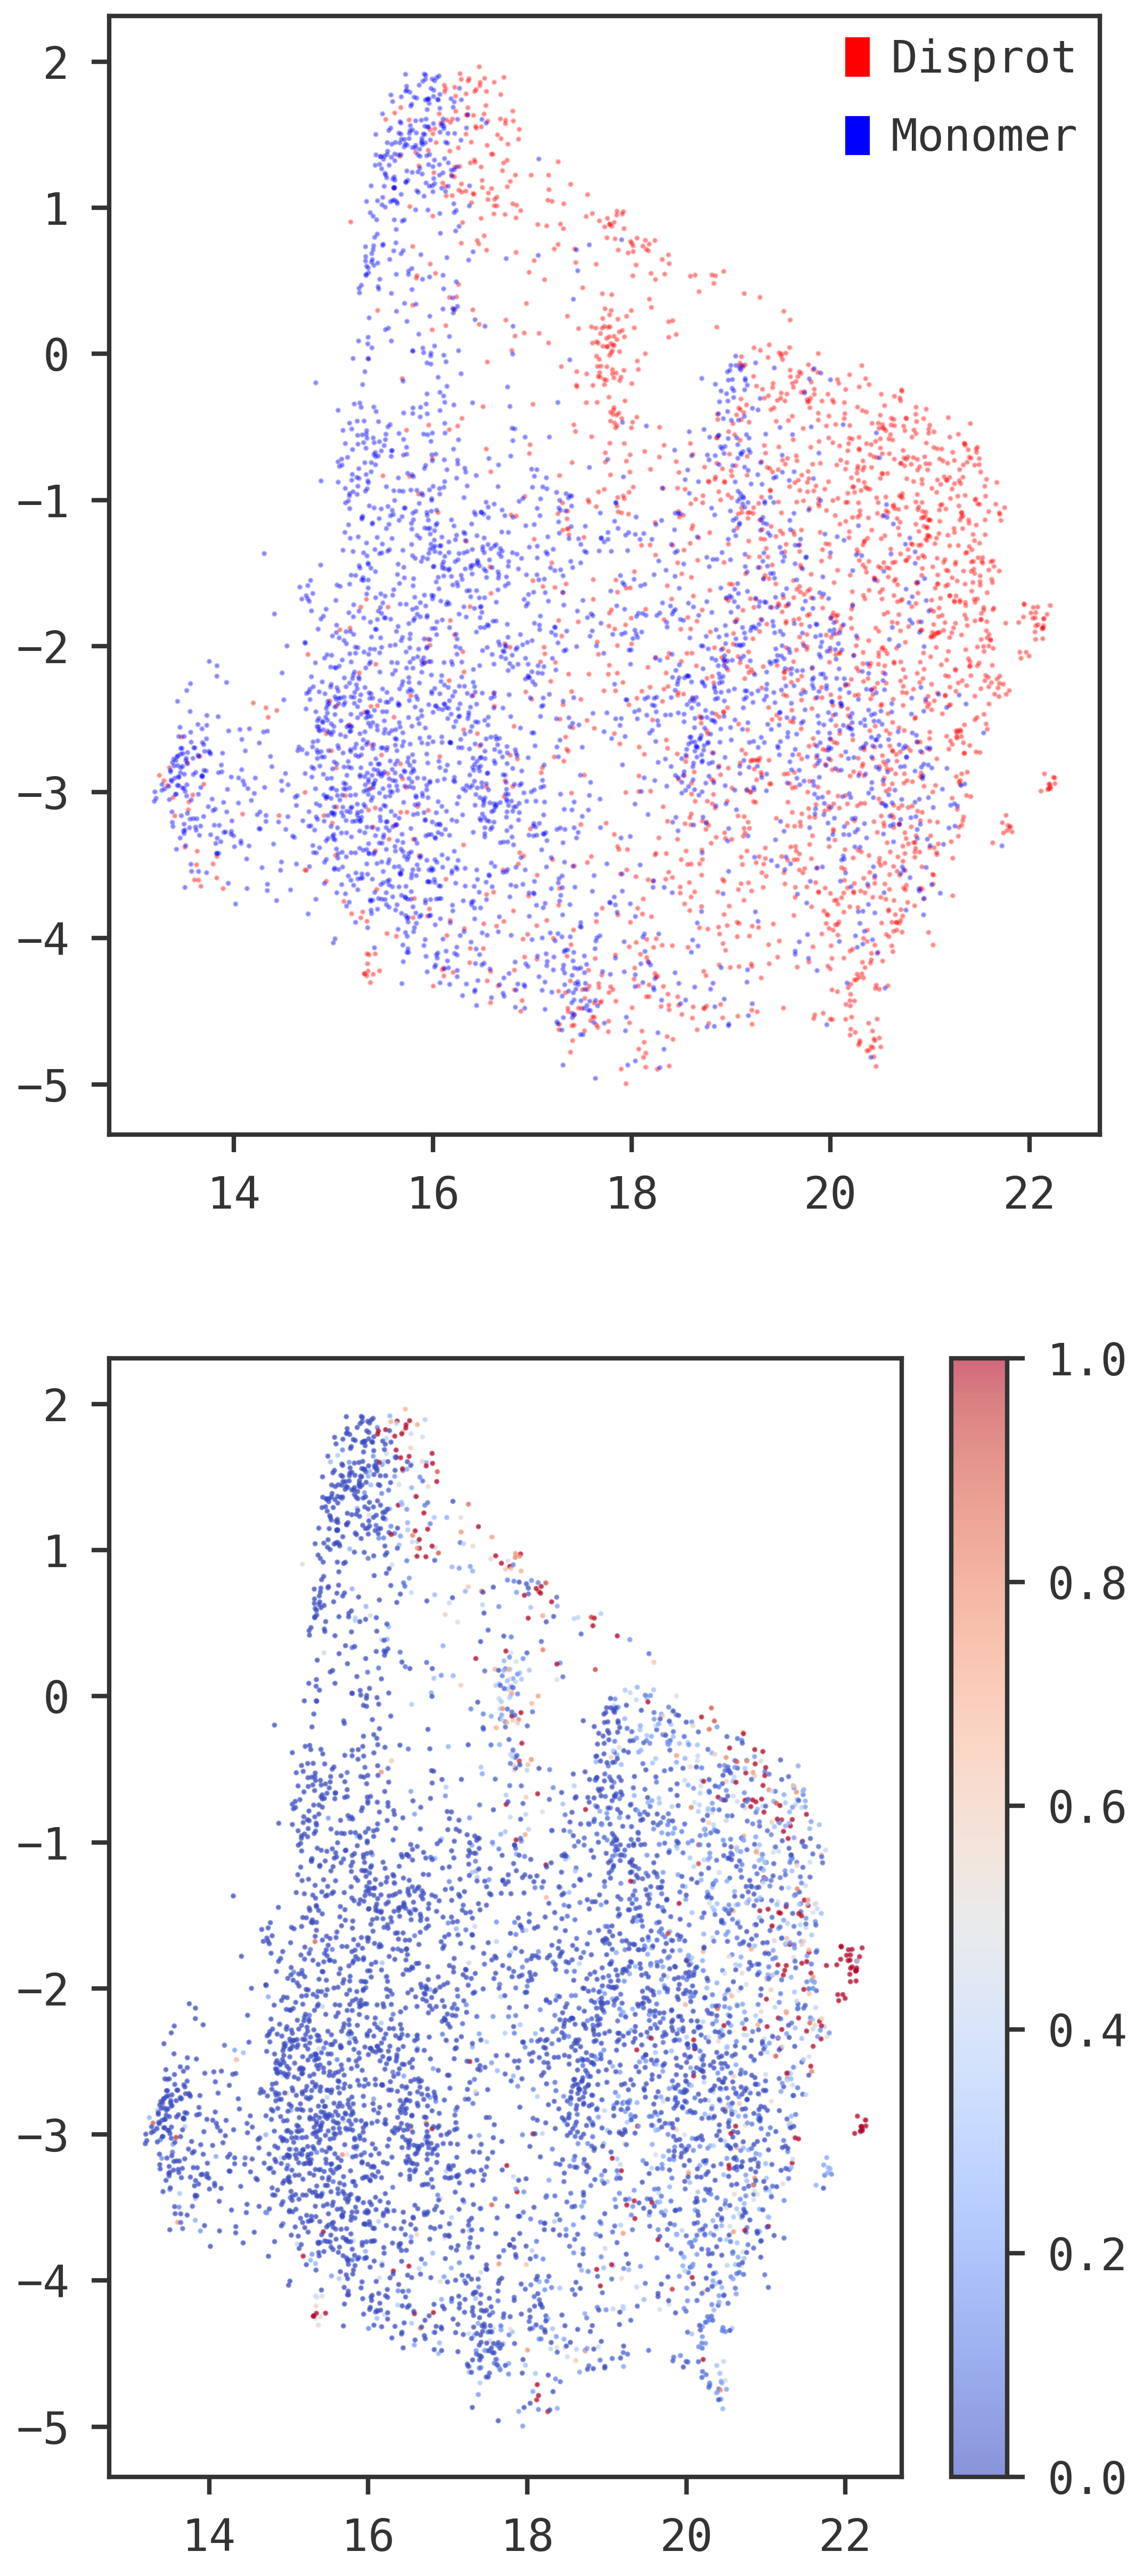

In [61]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'mono', fontsize = 20, colors = 'banskt', dpi = 300)


dataset_colors = list(np.repeat("red", num_disprot)) + list(np.repeat("blue", num_monomer))
fig = plt.figure(figsize=(8,20))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


ax1.scatter(umap_embedding[:,0], umap_embedding[:,1], c=dataset_colors, s=2, alpha=0.3)
legend_elements = [Patch(facecolor='red', edgecolor='red',label="Disprot"),
                   Patch(facecolor='blue', edgecolor='blue',label="Monomer")]
ax1.legend(handles=legend_elements, loc='upper right')

cmap = plt.get_cmap("coolwarm")

disorder_content_colors = list(disprot_disorder_contents) + list(np.repeat(0, num_monomer))
sc = ax2.scatter(umap_embedding[:,0], umap_embedding[:,1], c=disorder_content_colors, s=2, alpha=0.6, cmap=cmap)
plt.colorbar(sc, ax=ax2)
# cbar_ax = fig.add_axes([.905, .3, .05, .3])
# cbar=plt.colorbar(ax)
# cbar.set_yticklabels(["a","a","a","a","a","a"])

if not os.path.exists("plots"):
    os.makedirs("plots")
plt.savefig("plots/disprot_monomer_whole_protein_embeddings.png", bbox_inches='tight')
plt.show()